In [1]:
import json
import torch
import numpy as np
from transformers import AdamW
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from torch.utils.data import Subset

c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = 'qa_dataset.json'

with open(file_path, 'r') as file:
    data = json.load(file)

In [3]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [4]:
# Original 
# Prepare data 

# Tokenizing the data
# inputs = tokenizer([x['question'] + " [SEP] " + x['answer'] for x in data], padding=True, truncation=True, return_tensors="pt")

# Assuming binary classification (change as needed)
# labels = torch.tensor([1 if x['answer_length'] > 100 else 0 for x in data])

# Create a dataset
# dataset = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)

In [5]:
# Prepare data

# Tokenizing the data
max_length = max(len(tokenizer.encode(x['question'] + " [SEP] " + x['answer'])) for x in data)
tokenized_data = [tokenizer(x['question'] + " [SEP] " + x['answer'], 
                            padding='max_length',  
                            max_length=max_length,  
                            truncation=True, 
                            return_tensors="pt") for x in data]

# input
input_ids = torch.cat([item['input_ids'] for item in tokenized_data], dim=0)
attention_masks = torch.cat([item['attention_mask'] for item in tokenized_data], dim=0)
labels = torch.tensor([1 if x['answer_length'] > 100 else 0 for x in data])

# dataset seprate
input_ids_train, input_ids_test, attention_masks_train, attention_masks_test, labels_train, labels_test = train_test_split(
    input_ids, attention_masks, labels, train_size=0.7, random_state=42)

# create dataset
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)
dataset = TensorDataset(input_ids, attention_masks, labels)

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
# check GPU is work
# Train the model using a suitable optimizer and loss function.
if torch.cuda.is_available():
    print("CUDA is available. Using GPU.")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Using CPU.")
    device = torch.device("cpu")

CUDA is available. Using GPU.


In [8]:
print(len(dataset))
dataset[:10]

1628


(tensor([[ 101, 2515, 2023,  ...,    0,    0,    0],
         [ 101, 2064, 2017,  ...,    0,    0,    0],
         [ 101, 2054, 2003,  ...,    0,    0,    0],
         ...,
         [ 101, 2064, 2009,  ...,    0,    0,    0],
         [ 101, 7632, 2515,  ...,    0,    0,    0],
         [ 101, 2003, 1996,  ...,    0,    0,    0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([1, 0, 1, 0, 1, 0, 0, 0, 0, 0]))

## Config 1-8

Parameters: 
    Batch size: 4
    Epochs: 25
    Learning rate:1e-05



c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch 25: 100%|██████████| 285/285 [00:38<00:00,  7.48it/s, loss=2.49e-5]


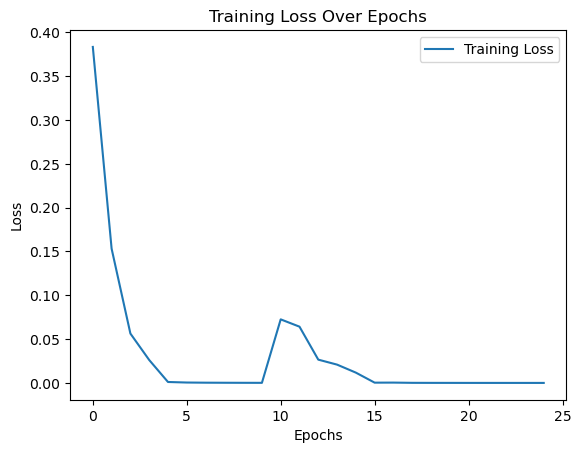

c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Parameters: 
    Batch size: 4
    Epochs: 25
    Learning rate:0.0001



Epoch 25: 100%|██████████| 285/285 [00:38<00:00,  7.48it/s, loss=1.88e-9] 


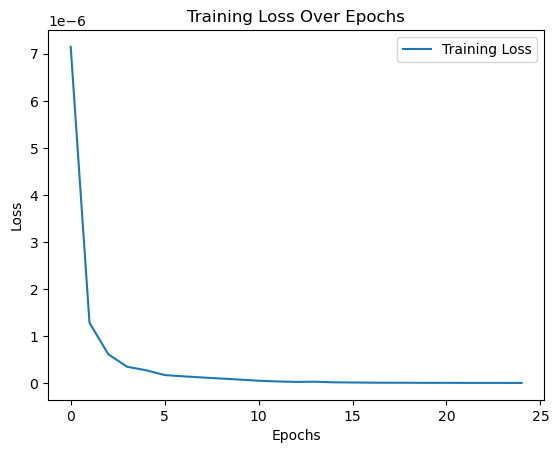

Parameters: 
    Batch size: 4
    Epochs: 30
    Learning rate:1e-05



Epoch 30: 100%|██████████| 285/285 [00:38<00:00,  7.47it/s, loss=2.09e-10]


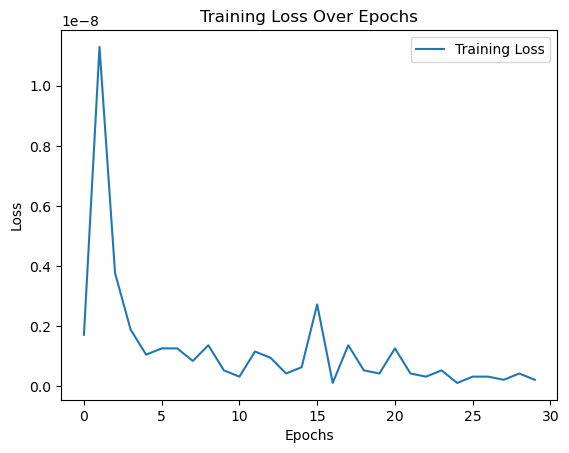

Parameters: 
    Batch size: 4
    Epochs: 30
    Learning rate:0.0001



Epoch 30: 100%|██████████| 285/285 [00:38<00:00,  7.47it/s, loss=0]


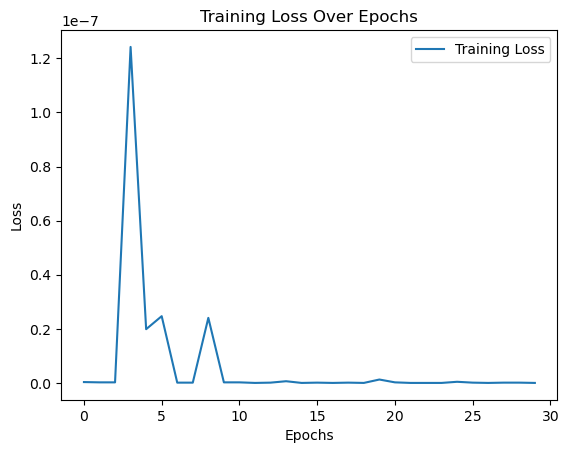

Parameters: 
    Batch size: 8
    Epochs: 25
    Learning rate:1e-05



Epoch 25: 100%|██████████| 143/143 [00:32<00:00,  4.42it/s, loss=2.08e-10]


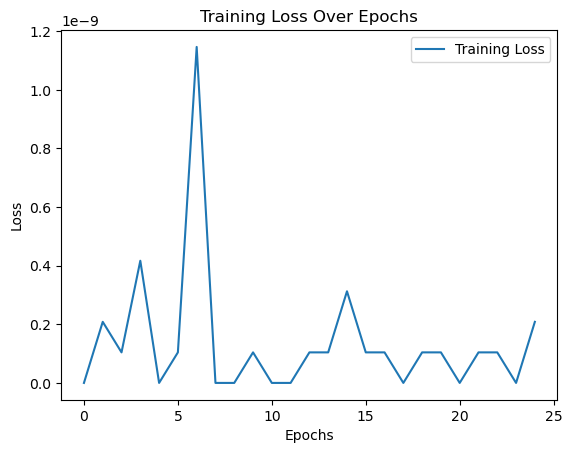

Parameters: 
    Batch size: 8
    Epochs: 25
    Learning rate:0.0001



Epoch 25: 100%|██████████| 143/143 [00:32<00:00,  4.42it/s, loss=0]


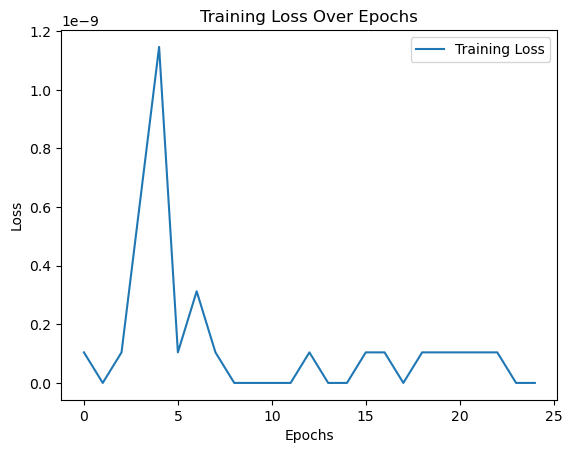

Parameters: 
    Batch size: 8
    Epochs: 30
    Learning rate:1e-05



Epoch 30: 100%|██████████| 143/143 [00:32<00:00,  4.43it/s, loss=0]


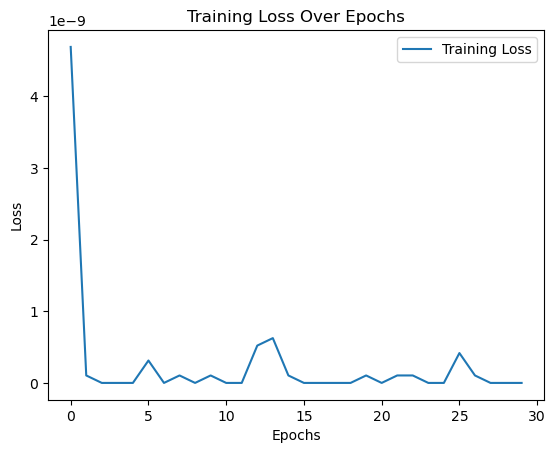

Parameters: 
    Batch size: 8
    Epochs: 30
    Learning rate:0.0001



Epoch 30: 100%|██████████| 143/143 [00:36<00:00,  3.97it/s, loss=0]


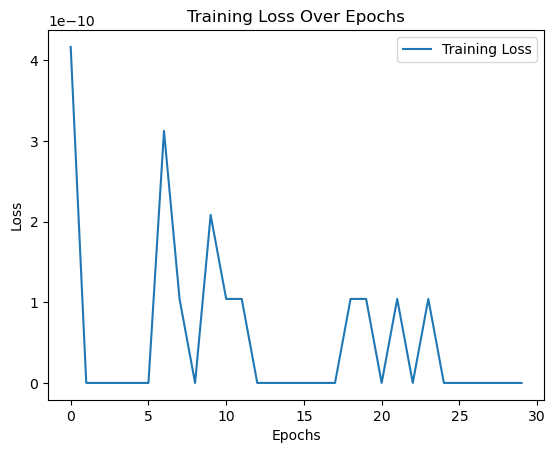

In [9]:
# Parameters
batch_size_list = [4, 8]
epochs_list = [25, 30]
learning_rate_list = [1e-5, 1e-4]

for batch_size in batch_size_list:
    for epochs in epochs_list:
        for learning_rate in learning_rate_list:
            print(f'Parameters: \n    Batch size: {batch_size}\n    Epochs: {epochs}\n    Learning rate:{learning_rate}\n')
            # Prepare for epoch_losses
            epoch_losses = []
            
            # Create dataloader
            train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
            test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)
            
            # Optimizer
            optimizer = AdamW(model.parameters(), lr=2e-5)
            
            # Training loop
            for epoch in range(epochs):
                model.train()
                total_loss = 0
                progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")
            
                for batch in progress_bar:
                    # b_input_ids, b_input_mask, b_labels = batch
                    b_input_ids, b_input_mask, b_labels = batch[0].to(device), batch[1].to(device), batch[2].to(device)
                    model.zero_grad()
            
                    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
                    loss = outputs.loss
                    total_loss += loss.item()
                    loss.backward()
                    optimizer.step()
            
                    # Update the progress bar
                    progress_bar.set_postfix({'loss': total_loss/len(train_dataloader)})
                    
                # Calculate and store the average loss for this epoch
                avg_loss = total_loss / len(train_dataloader)
                epoch_losses.append(avg_loss)
                
                # Save the model after each epoch
                # model_save_file = os.path.join(model_save_path, f'bert_model_epoch_{epoch+1}.pt')
                # torch.save(model.state_dict(), model_save_file)
            
                # Closing the progress bar and printing the epoch loss
                progress_bar.close()
                # print(f"Epoch {epoch+1} finished. Loss: {total_loss/len(train_dataloader)}")

            # Plotting the training loss
            plt.plot(epoch_losses, label='Training Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title('Training Loss Over Epochs')
            plt.legend()
            plt.show()

## Config 9

Epoch 1: 100%|██████████| 570/570 [00:54<00:00, 10.47it/s, loss=0]


Epoch 1 finished. Loss: 0.0


Epoch 2: 100%|██████████| 570/570 [00:56<00:00, 10.15it/s, loss=1.05e-10]


Epoch 2 finished. Loss: 1.045695460046964e-10


Epoch 3: 100%|██████████| 570/570 [00:51<00:00, 11.06it/s, loss=0]


Epoch 3 finished. Loss: 0.0


Epoch 4: 100%|██████████| 570/570 [00:51<00:00, 11.07it/s, loss=0]


Epoch 4 finished. Loss: 0.0


Epoch 5: 100%|██████████| 570/570 [00:51<00:00, 11.05it/s, loss=0]


Epoch 5 finished. Loss: 0.0


Epoch 6: 100%|██████████| 570/570 [00:51<00:00, 11.07it/s, loss=0]


Epoch 6 finished. Loss: 0.0


Epoch 7: 100%|██████████| 570/570 [00:51<00:00, 11.02it/s, loss=0]


Epoch 7 finished. Loss: 0.0


Epoch 8: 100%|██████████| 570/570 [00:51<00:00, 11.07it/s, loss=1.05e-10]


Epoch 8 finished. Loss: 1.045695460046964e-10


Epoch 9: 100%|██████████| 570/570 [00:51<00:00, 11.06it/s, loss=0]


Epoch 9 finished. Loss: 0.0


Epoch 10: 100%|██████████| 570/570 [00:51<00:00, 11.05it/s, loss=0]


Epoch 10 finished. Loss: 0.0


Epoch 11: 100%|██████████| 570/570 [00:51<00:00, 11.04it/s, loss=0]


Epoch 11 finished. Loss: 0.0


Epoch 12: 100%|██████████| 570/570 [00:51<00:00, 11.08it/s, loss=0]


Epoch 12 finished. Loss: 0.0


Epoch 13: 100%|██████████| 570/570 [00:51<00:00, 11.05it/s, loss=0]


Epoch 13 finished. Loss: 0.0


Epoch 14: 100%|██████████| 570/570 [00:51<00:00, 11.06it/s, loss=1.05e-10]


Epoch 14 finished. Loss: 1.045695460046964e-10


Epoch 15: 100%|██████████| 570/570 [00:51<00:00, 11.02it/s, loss=0]


Epoch 15 finished. Loss: 0.0


Epoch 16: 100%|██████████| 570/570 [00:51<00:00, 11.04it/s, loss=0]


Epoch 16 finished. Loss: 0.0


Epoch 17: 100%|██████████| 570/570 [00:51<00:00, 11.03it/s, loss=0]


Epoch 17 finished. Loss: 0.0


Epoch 18: 100%|██████████| 570/570 [00:51<00:00, 11.05it/s, loss=1.05e-10]


Epoch 18 finished. Loss: 1.045695460046964e-10


Epoch 19: 100%|██████████| 570/570 [00:51<00:00, 11.03it/s, loss=0]


Epoch 19 finished. Loss: 0.0


Epoch 20: 100%|██████████| 570/570 [00:51<00:00, 11.04it/s, loss=1.05e-10]


Epoch 20 finished. Loss: 1.045695460046964e-10


Epoch 21: 100%|██████████| 570/570 [00:51<00:00, 11.01it/s, loss=0]


Epoch 21 finished. Loss: 0.0


Epoch 22: 100%|██████████| 570/570 [00:51<00:00, 11.06it/s, loss=0]


Epoch 22 finished. Loss: 0.0


Epoch 23: 100%|██████████| 570/570 [00:51<00:00, 11.04it/s, loss=0]


Epoch 23 finished. Loss: 0.0


Epoch 24: 100%|██████████| 570/570 [00:51<00:00, 11.01it/s, loss=0]


Epoch 24 finished. Loss: 0.0


Epoch 25: 100%|██████████| 570/570 [00:51<00:00, 11.03it/s, loss=0]


Epoch 25 finished. Loss: 0.0


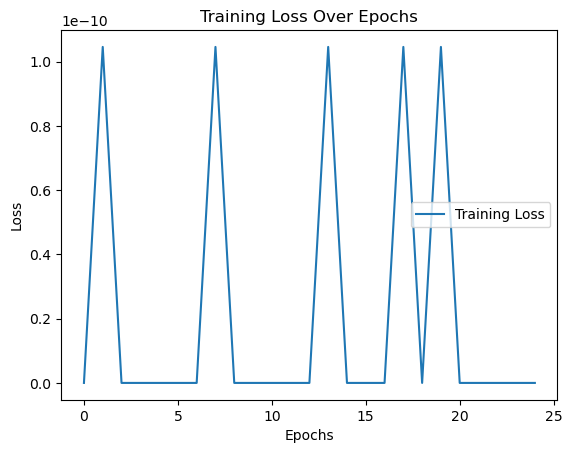

In [10]:
epochs = 25
batch_size = 2
# Prepare for epoch_losses
epoch_losses = []

# Create dataloader
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-6)

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")

    for batch in progress_bar:
        # b_input_ids, b_input_mask, b_labels = batch
        b_input_ids, b_input_mask, b_labels = batch[0].to(device), batch[1].to(device), batch[2].to(device)
        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Update the progress bar
        progress_bar.set_postfix({'loss': total_loss/len(train_dataloader)})
        
    # Calculate and store the average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    epoch_losses.append(avg_loss)
    
    # Save the model after each epoch
    # model_save_file = os.path.join(model_save_path, f'bert_model_epoch_{epoch+1}.pt')
    # torch.save(model.state_dict(), model_save_file)

    # Closing the progress bar and printing the epoch loss
    progress_bar.close()
    print(f"Epoch {epoch+1} finished. Loss: {total_loss/len(train_dataloader)}")
    
# Plotting the training loss
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

## Config 10

In [11]:
epochs = 25
batch_size = 8
# Prepare for epoch_losses
epoch_losses = []

# Create dataloader
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)
test_dataloader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=batch_size)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
for epoch in range(epochs):
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_dataloader, desc=f"Epoch {epoch+1}")

    for batch in progress_bar:
        # b_input_ids, b_input_mask, b_labels = batch
        b_input_ids, b_input_mask, b_labels = batch[0].to(device), batch[1].to(device), batch[2].to(device)
        model.zero_grad()

        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Update the progress bar
        progress_bar.set_postfix({'loss': total_loss/len(train_dataloader)})
        
    # Calculate and store the average loss for this epoch
    avg_loss = total_loss / len(train_dataloader)
    epoch_losses.append(avg_loss)
    
    # Save the model after each epoch
    # model_save_file = os.path.join(model_save_path, f'bert_model_epoch_{epoch+1}.pt')
    # torch.save(model.state_dict(), model_save_file)

    # Closing the progress bar and printing the epoch loss
    progress_bar.close()
    print(f"Epoch {epoch+1} finished. Loss: {total_loss/len(train_dataloader)}")

Epoch 1: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=1.04e-10]


Epoch 1 finished. Loss: 1.042039182214632e-10


Epoch 2: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 2 finished. Loss: 0.0


Epoch 3: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=3.13e-10]


Epoch 3 finished. Loss: 3.126117236092001e-10


Epoch 4: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 4 finished. Loss: 0.0


Epoch 5: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=1.04e-10]


Epoch 5 finished. Loss: 1.042039182214632e-10


Epoch 6: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 6 finished. Loss: 0.0


Epoch 7: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 7 finished. Loss: 0.0


Epoch 8: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 8 finished. Loss: 0.0


Epoch 9: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=1.04e-10]


Epoch 9 finished. Loss: 1.042039182214632e-10


Epoch 10: 100%|██████████| 143/143 [00:34<00:00,  4.15it/s, loss=0]


Epoch 10 finished. Loss: 0.0


Epoch 11: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 11 finished. Loss: 0.0


Epoch 12: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 12 finished. Loss: 0.0


Epoch 13: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 13 finished. Loss: 0.0


Epoch 14: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=1.04e-10]


Epoch 14 finished. Loss: 1.042039182214632e-10


Epoch 15: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 15 finished. Loss: 0.0


Epoch 16: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=2.08e-10]


Epoch 16 finished. Loss: 2.0840782402085058e-10


Epoch 17: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=2.08e-10]


Epoch 17 finished. Loss: 2.084078364429264e-10


Epoch 18: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 18 finished. Loss: 0.0


Epoch 19: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=2.08e-10]


Epoch 19 finished. Loss: 2.084078364429264e-10


Epoch 20: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 20 finished. Loss: 0.0


Epoch 21: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]


Epoch 21 finished. Loss: 0.0


Epoch 22: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 22 finished. Loss: 0.0


Epoch 23: 100%|██████████| 143/143 [00:34<00:00,  4.16it/s, loss=0]


Epoch 23 finished. Loss: 0.0


Epoch 24: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=1.04e-10]


Epoch 24 finished. Loss: 1.042039182214632e-10


Epoch 25: 100%|██████████| 143/143 [00:34<00:00,  4.17it/s, loss=0]

Epoch 25 finished. Loss: 0.0


In [12]:
model_save_path = 'models'  
os.makedirs(model_save_path, exist_ok=True)
final_model_save_file = os.path.join(model_save_path, 'bert_final_model_1.pt')
torch.save(model.state_dict(), final_model_save_file)

# print paramter
print("Training Parameters:")
print(f"Batch Size: {batch_size}")
print(f"Epochs: {epochs}")
print(f"Learning Rate: {optimizer.defaults['lr']}")
print(f"Beta1: {optimizer.defaults['betas'][0]}")
print(f"Beta2: {optimizer.defaults['betas'][1]}")

print(f"Training completed. Final model saved to {final_model_save_file}")

Training Parameters:
Batch Size: 8
Epochs: 25
Learning Rate: 2e-05
Beta1: 0.9
Beta2: 0.999
Training completed. Final model saved to models\bert_final_model_1.pt


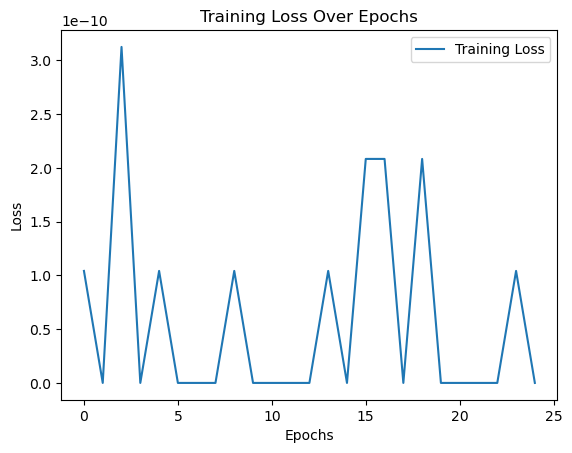

In [13]:
# Plotting the training loss
plt.plot(epoch_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

### Evulation 

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Switch to evaluation mode
model.eval()

predictions, true_labels = [], []

# Add tqdm progress bar
for batch in tqdm(test_dataloader, desc="Evaluating"):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels = batch

    with torch.no_grad():
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    logits = outputs.logits
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    batch_preds = np.argmax(logits, axis=1)
    predictions.extend(batch_preds)
    true_labels.extend(label_ids)

# Calculate the accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy: {accuracy}")


Evaluating: 100%|██████████| 62/62 [00:04<00:00, 13.50it/s]

Accuracy: 0.9366053169734151


### K-Fold

In [15]:
import numpy as np
# Define the KFold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize performance metric list
fold_performance = []

# Parameters
batch_size = 8
epochs = 2
learning_rate = 2e-5

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start the KFold cross-validation
for fold, (train_ids, test_ids) in enumerate(kf.split(dataset)):
    print(f"FOLD {fold}")
    print("-------------------------------")

    # Split the data into training and validation sets for the current fold
    train_subset = Subset(dataset, train_ids)
    test_subset = Subset(dataset, test_ids)
    
    train_dataloader = DataLoader(train_subset, sampler=RandomSampler(train_subset), batch_size=batch_size)
    test_dataloader = DataLoader(test_subset, sampler=SequentialSampler(test_subset), batch_size=batch_size)
    
    # Initialize the BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
    model.to(device)
    
    # Define the optimizer
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    model.train()
    
    # Training loop for the current fold
    for epoch in range(epochs):
        total_loss = 0
        
        train_progress_bar = tqdm(train_dataloader, desc=f"Training Epoch {epoch+1}/{epochs}, Fold {fold+1}/10")
        
        for step, batch in enumerate(train_progress_bar):
            batch = tuple(t.to(device) for t in batch)
            b_input_ids, b_input_mask, b_labels = batch
            
            model.zero_grad()
            
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_loss += loss.item()
            
            loss.backward()
            optimizer.step()
            
            train_progress_bar.set_postfix(loss=total_loss/(step+1))
        
        train_progress_bar.close()
        
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
        
    # Validation step
    model.eval()
    total_eval_accuracy = 0
    total_eval_loss = 0

    eval_progress_bar = tqdm(test_dataloader, desc=f"Validation, Fold {fold+1}/10")

    for batch in eval_progress_bar:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
    
        with torch.no_grad():
            outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
    
        loss = outputs.loss
        total_eval_loss += loss.item()
    
        # Move logits and labels to CPU
        logits = outputs.logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences
        preds = np.argmax(logits, axis=1)
        batch_accuracy = np.mean(preds == label_ids)
        total_eval_accuracy += batch_accuracy
        
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(test_dataloader)
    print(f"Validation accuracy: {avg_val_accuracy}")


    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(test_dataloader)
    
    # Record all statistics from this epoch.
    fold_performance.append({
        'fold': fold,
        'train_loss': avg_train_loss,
        'val_loss': avg_val_loss,
        'val_accuracy': avg_val_accuracy
    })

    eval_progress_bar.close()

# Calculate and print the average performance across all folds
average_performance = {
    'avg_train_loss': np.mean([x['train_loss'] for x in fold_performance]),
    'avg_val_loss': np.mean([x['val_loss'] for x in fold_performance]),
    'avg_val_accuracy': np.mean([x['val_accuracy'] for x in fold_performance])
}
print(f"Average performance across all folds: {average_performance}")

FOLD 0
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Andy Cui\.conda\envs\nlp\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Validation, Fold 1/10: 100%|██████████| 21/21 [00:01<00:00, 13.73it/s]


Validation accuracy: 0.9285714285714286
FOLD 1
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 2/10: 100%|██████████| 21/21 [00:01<00:00, 13.58it/s]


Validation accuracy: 0.9226190476190477
FOLD 2
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 3/10: 100%|██████████| 21/21 [00:01<00:00, 13.49it/s]


Validation accuracy: 0.9404761904761905
FOLD 3
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 4/10: 100%|██████████| 21/21 [00:01<00:00, 13.45it/s]


Validation accuracy: 0.9007936507936508
FOLD 4
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 5/10: 100%|██████████| 21/21 [00:01<00:00, 13.54it/s]


Validation accuracy: 0.9226190476190477
FOLD 5
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 6/10: 100%|██████████| 21/21 [00:01<00:00, 13.54it/s]


Validation accuracy: 0.9345238095238095
FOLD 6
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 7/10: 100%|██████████| 21/21 [00:01<00:00, 13.53it/s]


Validation accuracy: 0.9107142857142857
FOLD 7
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 8/10: 100%|██████████| 21/21 [00:01<00:00, 13.56it/s]


Validation accuracy: 0.9226190476190477
FOLD 8
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 9/10: 100%|██████████| 21/21 [00:01<00:00, 13.55it/s]


Validation accuracy: 0.9047619047619048
FOLD 9
-------------------------------


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Validation, Fold 10/10: 100%|██████████| 21/21 [00:01<00:00, 13.01it/s]

Validation accuracy: 0.9107142857142857
Average performance across all folds: {'avg_train_loss': 0.13751504103091303, 'avg_val_loss': 0.18542413024586582, 'avg_val_accuracy': 0.9198412698412699}
